In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [7]:
# Replace 'your_data_file.csv' with the actual filename
data = pd.read_csv('student_data.csv')

In [22]:
# Summary of numerical columns
data.drop(columns=['Student_ID']).describe()

,Age,Sleep_Duration,Study_Hours,Screen_Time,Physical_Activity
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,21.53600,6.472400,5.981600,2.525000,62.342000
std,2.33315,1.485764,3.475725,0.859414,35.191674
min,18.00000,4.000000,0.100000,1.000000,0.000000
25%,20.00000,5.100000,2.900000,1.800000,32.750000
50%,21.00000,6.500000,6.050000,2.600000,62.500000
75%,24.00000,7.800000,8.800000,3.300000,93.250000
max,25.00000,9.000000,12.000000,4.000000,120.000000


In [9]:
data['Gender'].value_counts()

Gender
Male      186
Female    166
Other     148
Name: count, dtype: int64

In [10]:
data['University_Year'].value_counts()

University_Year
3rd Year    132
2nd Year    131
1st Year    125
4th Year    112
Name: count, dtype: int64

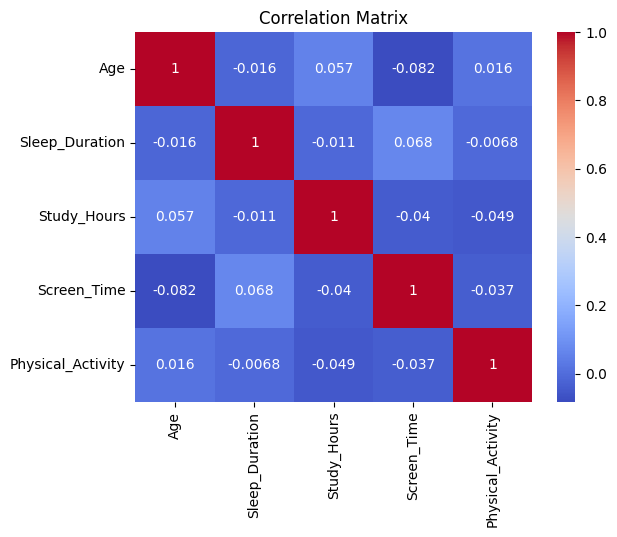

In [12]:
# Select relevant columns for correlation analysis
correlation_matrix = data[['Age', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Physical_Activity']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Separate data by gender
male_pa = data[data['Gender'] == 'Male']['Physical_Activity']
female_pa = data[data['Gender'] == 'Female']['Physical_Activity']

# T-test
t_stat, p_value = stats.ttest_ind(male_pa, female_pa)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 1.1551099639705837, P-value: 0.24883338805795432


In [14]:
# Group data by university year
year_groups = [group['Physical_Activity'].values for name, group in data.groupby('University_Year')]

# ANOVA
f_stat, p_value = stats.f_oneway(*year_groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 0.5883189070953783, P-value: 0.6228882772721476


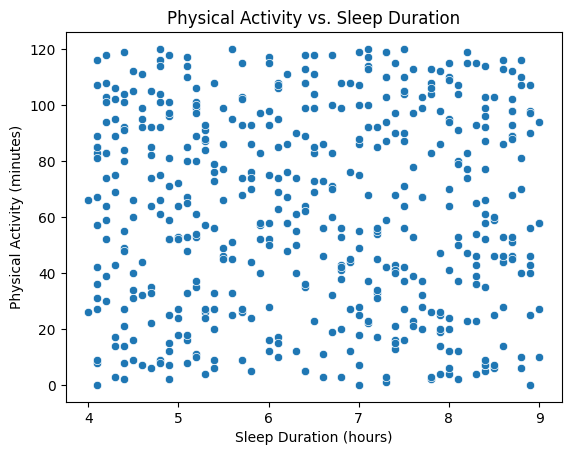

In [17]:
sns.scatterplot(data=data, x='Sleep_Duration', y='Physical_Activity')
plt.title('Physical Activity vs. Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Physical Activity (minutes)')
plt.show()


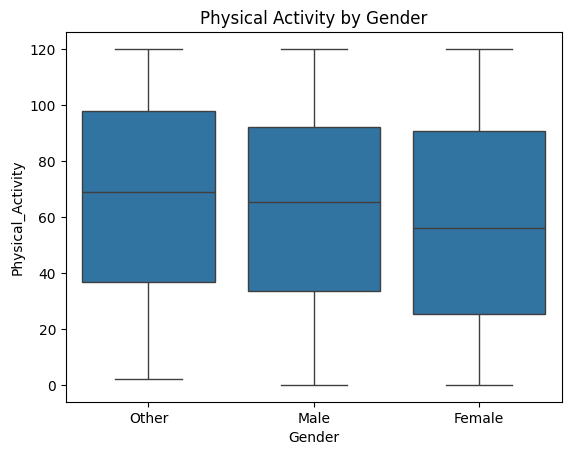

In [18]:
sns.boxplot(data=data, x='Gender', y='Physical_Activity')
plt.title('Physical Activity by Gender')
plt.show()

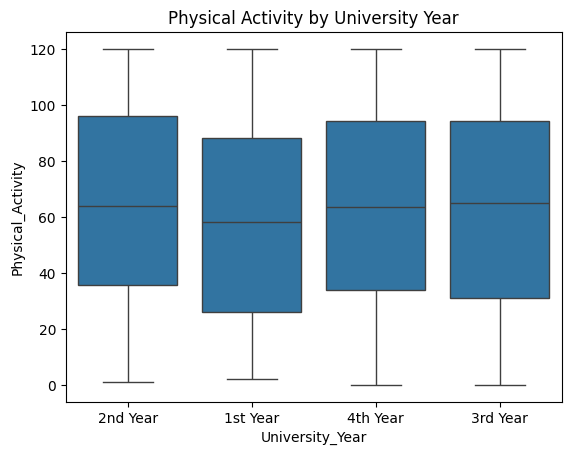

In [19]:
sns.boxplot(data=data, x='University_Year', y='Physical_Activity')
plt.title('Physical Activity by University Year')
plt.show()

In [20]:
# Mean and standard error
mean_pa = np.mean(data['Physical_Activity'])
se_pa = stats.sem(data['Physical_Activity'])

# 95% Confidence Interval
ci = stats.t.interval(0.95, len(data['Physical_Activity'])-1, loc=mean_pa, scale=se_pa)
print(f"95% Confidence Interval for Physical Activity: {ci}")


95% Confidence Interval for Physical Activity: (59.249870529049375, 65.43412947095062)
